In [2]:
import matplotlib as mpl

fsize = 12
mpl.rcParams['legend.fontsize'] = fsize
mpl.rcParams["figure.figsize"] = (6,5)
mpl.rcParams['axes.labelsize'] = fsize
mpl.rcParams['xtick.labelsize'] = fsize
mpl.rcParams['ytick.labelsize'] = fsize
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['mathtext.fontset'] = 'dejavusans'
mpl.rcParams.update({'font.size': fsize})

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import mpmath as mp

from scipy.special import legendre
from scipy.special import roots_legendre
from math import atan2

Potenical efectivo entre dos particulas $\alpha$

$V^{eff}(r) = V_C(r)+\bar{V}(r)+\frac{\hbar^2}{2\mu}\frac{l(l+1)}{r^2}$

$V_C(r) = \frac{1}{4\pi\varepsilon_0}\frac{4e^2}{r} \text{, for } r\geq R_C \approx R_P+R_T =2R_\alpha$

$~~~~~~~~~~~= \frac{1}{4\pi\varepsilon_0}\frac{4e^2}{2R_C}\left(3-\frac{r^2}{R_C^2}\right) \text{, for } r < R_C$

$\bar{V}(r) = -V_0e^{-r^2/\bar{R}^2}$

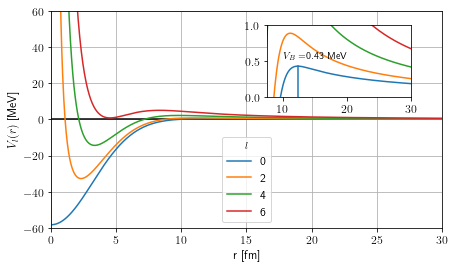

In [3]:
m_a_c2 = 3727.3794066 #MeV

mu_c2 = m_a_c2*m_a_c2/(m_a_c2+m_a_c2) #MeV

hbar_c = 197.3269804 #MeV fm

hb2_2mu = (hbar_c**2)/(2*mu_c2)

R_C = 4.5 #fm == R_bar
V_0 = 60 #MeV

e2_4pie0 = 1.44 #MeV fm

def V_C(x):
    if x>R_C:
        return 4*e2_4pie0/x
    else:
        return e2_4pie0*(2/R_C)*(3-(x/R_C)**2)
    
def V_bar(x):
    return -V_0*np.exp(-(x/R_C)**2)

def V_eff(x, l):
    return V_C(x) + V_bar(x) + hb2_2mu*l*(l+1)/(x**2)

x = np.linspace(0.1, 30, 1000)

l_list = np.arange(0, 7, 2)
#l_list = [1]

fig, ax = plt.subplots(1,1, figsize=(7,4))

ax.axhline(y=0, color='k')

axins = inset_axes(ax, 2,1 , loc=1,bbox_to_anchor=(0.85, 0.85),bbox_transform=ax.figure.transFigure)

for l_id, l in enumerate(l_list):
    V_eff_values = np.vectorize(V_eff)(x, l)

    ax.plot(x, V_eff_values, label=str(l))
    axins.plot(x, V_eff_values)

    if l==0:
        index_max = np.argmax(V_eff_values)
        max_x = x[index_max]
        max_y = V_eff_values[index_max]
        axins.axvline(x=max_x, ymin=0, ymax=max_y)
        axins.text(x=10, y=0.55, s=r'$V_B=$'+str(round(max_y,2))+' MeV')

ax.set_xlabel(r'r [fm]')
ax.set_ylabel(r'$V_l(r)$ [MeV]')

ax.legend(title=r"$l$", loc='lower center')

ax.grid()

ax.set_xlim(0,30)
ax.set_ylim(-60,60)

# sub region of the original image
x1, x2, y1, y2 = 7.5, 30, 0, 1
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
#plt.yscale(value='log')

plt.savefig('V_l_eff.pdf', bbox_inches='tight')

funciones de Lagrange-Legendre

$\phi_i(r)=(-1)^{N+i}\left(\frac{r}{ax_i}\right)^n\sqrt{ax_i(1-x_i)}\frac{P_N(2r/a-1)}{r-ax_i}$

pagina 43: elementos de matriz cinética 

$\bra{\phi_i}T_0+L(0)\ket{\phi_i}=\frac{(4N^2+4N+3)x_i(1-x_i)-6x_i+1}{3a^2x_i^2(1-x_i)^2}$

$\bra{\phi_i}T_0+L(0)\ket{\phi_j}=\frac{(-1)^{i+j}}{a^2[x_ix_j(1-x_i)(1-x_j)]^{1/2}}\left[N^2+N+1+\frac{x_i+x_j-2x_ix_j}{(x_i-x_k)^2}-\frac{1}{1-x_i}-\frac{1}{1-x_j}\right]$

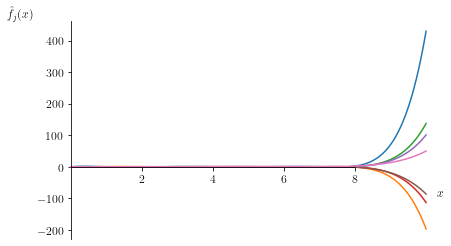

In [4]:
x = np.linspace(0, 10, 1000)

N = 7
a = 8

#List of all Laguerre polynomial zeroes
Legendre_zeroes = (roots_legendre(N)[0]+1)/2

def Lagrange_Legendre(x, x_j, j, N, a, n=1):
    return (-1)**(N+j) * (x/(a*x_j))**n * np.sqrt(a*x_j*(1-x_j)) * (legendre(N)((2*x/a)-1) / (x - a*x_j))

f_N = [Lagrange_Legendre(x, Legendre_zeroes[i-1], i, N, a) for i in range(1,N+1)]

# print(roots_laguerre(4)[0])
fig, ax = plt.subplots(1,1, figsize=(7,4))

for i in range(0, N):
    ax.plot(x, f_N[i])

#ax.set_ylim(-1,1.5)
ax.set_ylabel(r'$\hat{f}_j(x)$', loc='top', rotation=0)
ax.set_xlabel(r'$x$', loc='right')

x_major = [a/4, a/2, 3*a/4, a]
ax.set_xticks(x_major)

# set the y-spine
ax.spines['left'].set_position('zero') # set left spine to y=0
ax.spines['right'].set_color('none') # turn off the right spine/ticks
ax.yaxis.tick_left()

# set the x-spine
ax.spines['bottom'].set_position('zero') # set bottom spine to x=0
ax.spines['top'].set_color('none') # turn off the top spine/ticks
ax.xaxis.tick_bottom()
ax.spines['bottom'].set_bounds((0, x_major[-1]))

plt.savefig('f_hat.pdf', bbox_inches='tight')

In [17]:
#construcción de la matriz C

def C_ij(i, j, a, N, l):
    Legendre_zeroes = (roots_legendre(N)[0]+1)/2
    x_i = Legendre_zeroes[i-1]

    T_L_ij = 0
    V_ij = 0

    B = hb2_2mu/(a**2)

    if i==j:
        T_L_ij = B*((4*N**2+4*N+3)*x_i*(1-x_i) - 6*x_i + 1)/(3*x_i**2 * (1-x_i)**2)
        V_ij = V_eff(a*x_i, l)
    else:
        x_j = Legendre_zeroes[j-1]
        A1 = (-1)**(i-j)/(x_i*x_j*(1-x_i)*(1-x_j))**(0.5)
        A2 = N**2 + N + 1 + ((x_i+x_j-2*x_i*x_j)/(x_i-x_j)**2) - 1/(1-x_i) - 1/(1-x_j)
        T_L_ij = B * A1 * A2
    
    return T_L_ij+V_ij

In [6]:
#construcción de R matriz

def R_l(C_matrix, f_N, a):
    B = hb2_2mu/(a**2)

    C_inv = np.linalg.inv(C_matrix)

    sum =  f_N.dot(C_inv.dot(f_N))

    return B*sum

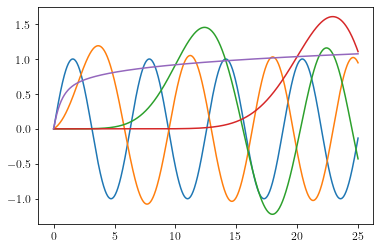

In [8]:
F1 = np.vectorize(lambda x: mp.coulombf(0,0,x))
F2 = np.vectorize(lambda x: mp.coulombf(0,1,x))
F3 = np.vectorize(lambda x: mp.coulombf(0,5,x))
F4 = np.vectorize(lambda x: mp.coulombf(0,10,x))
F5 = np.vectorize(lambda x: mp.coulombf(0,x/2,x))

x = np.linspace(0,25, 1000)
plt.plot(x, np.array([F1(x), F2(x), F3(x), F4(x), F5(x)]).T)

(-2.0, 2.0)

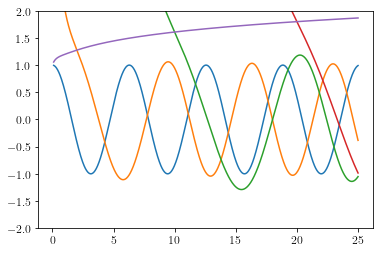

In [12]:
G1 = np.vectorize(lambda x: mp.coulombg(0,0,x))
G2 = np.vectorize(lambda x: mp.coulombg(0,1,x))
G3 = np.vectorize(lambda x: mp.coulombg(0,5,x))
G4 = np.vectorize(lambda x: mp.coulombg(0,10,x))
G5 = np.vectorize(lambda x: mp.coulombg(0,x/2,x))

x = np.linspace(0.1,25, 1000)
plt.plot(x, np.array([G1(x), G2(x), G3(x), G4(x), G5(x)]).T)
plt.ylim(-2,2)

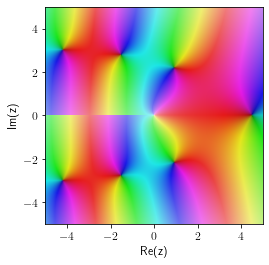

In [14]:

mp.cplot(lambda z: mp.coulombg(1,1,z), points=50000)

[[ 515.05160167 -211.88411994  133.18511545 -116.49229061  122.74945797
  -152.72543858  116.70100445]
 [-211.88411994   55.68867334  -71.1659925    55.94522653  -57.99007328
    71.83184763  -54.82908184]
 [ 133.18511545  -71.1659925    14.51443077  -46.94914502   43.57453427
   -53.0431251    40.34627824]
 [-116.49229061   55.94522653  -46.94914502   21.84898982  -45.56074693
    49.53269287  -37.15164777]
 [ 122.74945797  -57.99007328   43.57453427  -45.56074693   43.56657583
   -62.08024564   41.96533993]
 [-152.72543858   71.83184763  -53.0431251    49.53269287  -62.08024564
    86.96589355  -73.26693727]
 [ 116.70100445  -54.82908184   40.34627824  -37.15164777   41.96533993
   -73.26693727   66.93850013]]
[[ 515.05160167 -211.88411994  133.18511545 -116.49229061  122.74945797
  -152.72543858  116.70100445]
 [-211.88411994   55.68867334  -71.1659925    55.94522653  -57.99007328
    71.83184763  -54.82908184]
 [ 133.18511545  -71.1659925    14.51443077  -46.94914502   43.57453427


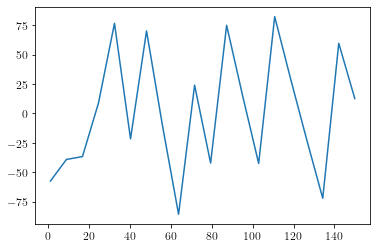

In [22]:
l = 0
Z_1 = 2 #Z_alpha
Z_2 = 2 #Z_alpha
e2 = 1.44 #MeV fm
mu_c2

Energy_values = np.linspace(1, 150, 20) #MeV
#Energy_values = [10]

S_l_values = list()

for E in Energy_values:

    heta = (Z_1*Z_2*e2/hbar_c)*np.sqrt(mu_c2/(2*E))

    G = np.vectorize(lambda r: mp.coulombg(l,heta,r))
    F = np.vectorize(lambda r: mp.coulombf(l,heta,r))

    def H_l_minus(rho):
        return G(rho) - 1j*F(rho)

    def H_l_plus(rho):
        return G(rho) + 1j*F(rho)

    def S_l(Energy):

        k = np.sqrt(2*mu_c2*Energy)/hbar_c
        rho = k*a

        C_matrix = np.zeros((N,N))

        for m in range(1, N+1):
            C_matrix[m-1] = np.array([C_ij(m, n, a, N, l) for n in range(1, N+1)])
            C_matrix[m-1][m-1] - Energy

        print(C_matrix)

        f_N = np.array([Lagrange_Legendre(a, Legendre_zeroes[i-1], i, N, a, n=1) for i in range(1,N+1)])

        numerator = H_l_minus(rho) - rho*R_l(C_matrix, f_N, a)*mp.diff(H_l_minus, rho)
        denominator = H_l_plus(rho) - rho*R_l(C_matrix, f_N, a)*mp.diff(H_l_plus, rho)

        return numerator/denominator
    
    S_l_values.append(S_l(E))

#print(S_l_values)

#print(atan2(S_l_values[0].imag, S_l_values[0].real))

d_l_values = [np.degrees(atan2(s.imag, s.real)/2) for s in S_l_values]

plt.plot(Energy_values, d_l_values)
